In [25]:
# Initial imports
import os
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import quandl as qd
from dotenv import load_dotenv

load_dotenv()
%matplotlib inline

In [26]:
# Define tickers symbols
qd.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')

ticker_symbols = ['QCOM', 'FB']
start_year = '2015-1-1'
end_year = '2020-1-1'

stocks_df = pd.DataFrame()

for t in ticker_symbols:
    
    #ticker_df = qd.get(f'EOD/{t}', start_date=start_year, end_date=end_year)
    ticker_df = qd.get(f'WIKI/{t}', start_date=start_year, end_date=end_year)

    # Save the close columns of each stock into new variables
    t = ticker_df['Close']
    
    stocks_df = stocks_df.append(t)

stocks_df = stocks_df.T
stocks_df.columns = ticker_symbols

stocks_df.head(10)

,QCOM,FB
2015-01-02,74.280,78.450
2015-01-05,73.930,77.190
2015-01-06,72.880,76.150
2015-01-07,73.730,76.150
2015-01-08,74.505,78.175
2015-01-09,74.420,77.740
2015-01-12,73.570,76.720
2015-01-13,72.970,76.450
2015-01-14,72.220,76.280
2015-01-15,71.380,74.050


In [27]:
def analyse_my_stock_portfolio2(stocks, weighting, plot):

    print(f"This is your combined stock portfolio:\n {stocks}")
    print()

    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = stocks.pct_change().dropna()
    print()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    #portfolio_return = combined_stock_df.dot(weighting[0:])
    portfolio_cum_return = (1+daily_returns).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################
                   
    # Plot daily returns
    if plot == 'daily_returns_line':
        fig = plt.figure()
        plot1 = daily_returns.plot(title='Daily returns', figsize=(15, 10))    
        plot1.set_xlabel("")

    #Plot daily returns_box    
    elif plot == 'daily_returns_box':
        fig = plt.figure()
        sns.boxplot(data=daily_returns).set_title('Daily returns')
        sns.set(rc={'figure.figsize':(15, 10)})

    # Plot cumulative returns
    elif plot == 'cumulative_returns':  
        fig = plt.figure()
        plot3 = portfolio_cum_return.plot(title='Cumulative Returns')
        plot3.set_xlabel("")
        
    #Plot 21-day rolling std dev
    elif plot == '21_day_roll':
        fig = plt.figure()
        plot4 = roll_std.plot(figsize=(15, 10), title='Rolling 21-day standard deviation')
        plot4.set_xlabel(" ")
        
    #Plot correlation
    elif plot == 'correlation':
        fig = plt.figure()
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)  
        sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask)
        sns.set(rc={'figure.figsize':(15,10)})
           
    #Plot Sharpe Ratio
    elif plot =='sharpe_ratio':        
        fig = plt.figure()
        sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', figsize=(15, 10))
   
    else: 
        pass
        
    fig.savefig(f"PerformanceAnalysis_{plot}_Summary.png")

    plt.show()

This is your combined stock portfolio:
               QCOM       FB
2015-01-02  74.280   78.450
2015-01-05  73.930   77.190
2015-01-06  72.880   76.150
2015-01-07  73.730   76.150
2015-01-08  74.505   78.175
...            ...      ...
2018-03-22  55.580  164.890
2018-03-23  53.660  159.390
2018-03-26  56.130  160.060
2018-03-27  54.840  152.190
2017-08-07     NaN  171.980

[813 rows x 2 columns]



These are your daily returns:
                 QCOM        FB
2015-01-05 -0.004712 -0.016061
2015-01-06 -0.014203 -0.013473
2015-01-07  0.011663  0.000000
2015-01-08  0.010511  0.026592
2015-01-09 -0.001141 -0.005564
...              ...       ...
2018-03-22 -0.021651 -0.026566
2018-03-23 -0.034545 -0.033356
2018-03-26  0.046031  0.004204
2018-03-27 -0.022982 -0.049169
2017-08-07  0.000000  0.130035

[812 rows x 2 columns]



This is your correlation matrix 
           QCOM        FB
QCOM  1.000000  0.168839
FB    0.168839  1.000000



This is your Sharpe Ratio:
 QCOM   -0.171181
FB      1.

<Figure size 432x288 with 0 Axes>

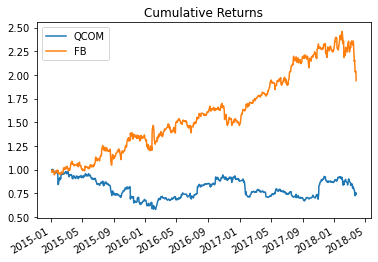

In [28]:
weight = [1/len(ticker_symbols)] * len(ticker_symbols)

analyse_my_stock_portfolio2(stocks_df, weight, plot='cumulative_returns')